# DeepGen Demo

In [4]:
from src.pipelines import DeepGenPipeline

checkpoint = "/home/biki/.cache/huggingface/hub/models--deepgenteam--DeepGen-1.0/snapshots/edef11928c6b4d0e8b2a3b9d7f061b352480d5cc/model.pt"
pipe = DeepGenPipeline(checkpoint=checkpoint)

/usr/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/usr/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


Number of gpus: 1
['Hello this is GPU 0']
Device: cuda


`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Found 416 lora modules: ['model.visual.blocks.0.attn.qkv', 'model.visual.blocks.0.attn.proj', 'model.visual.blocks.0.mlp.gate_proj', 'model.visual.blocks.0.mlp.up_proj', 'model.visual.blocks.0.mlp.down_proj', 'model.visual.blocks.1.attn.qkv', 'model.visual.blocks.1.attn.proj', 'model.visual.blocks.1.mlp.gate_proj', 'model.visual.blocks.1.mlp.up_proj', 'model.visual.blocks.1.mlp.down_proj', 'model.visual.blocks.2.attn.qkv', 'model.visual.blocks.2.attn.proj', 'model.visual.blocks.2.mlp.gate_proj', 'model.visual.blocks.2.mlp.up_proj', 'model.visual.blocks.2.mlp.down_proj', 'model.visual.blocks.3.attn.qkv', 'model.visual.blocks.3.attn.proj', 'model.visual.blocks.3.mlp.gate_proj', 'model.visual.blocks.3.mlp.up_proj', 'model.visual.blocks.3.mlp.down_proj', 'model.visual.blocks.4.attn.qkv', 'model.visual.blocks.4.attn.proj', 'model.visual.blocks.4.mlp.gate_proj', 'model.visual.blocks.4.mlp.up_proj', 'model.visual.blocks.4.mlp.down_proj', 'model.visual.blocks.5.attn.qkv', 'model.visual.blocks.

/home/biki/Work/ai/deepgen/.venv/lib/python3.12/site-packages/peft/tuners/tuners_utils.py:919: UserWarning: Model with `tie_word_embeddings=True` and the tied_target_modules=['model.language_model.embed_tokens', 'lm_head'] are part of the adapter. This can lead to complications, for example when merging the adapter or converting your model to formats other than safetensors. See for example https://github.com/huggingface/peft/issues/2018.
  warnings.warn(


Unexpected parameters: []


In [3]:
from dataclasses import dataclass, field


@dataclass
class Scene:
    title: str
    prompt: str


@dataclass
class Story:
    title: str
    scenes: list[Scene] = field(default_factory=list)

    @property
    def prompts(self) -> list[str]:
        return [s.prompt for s in self.scenes]


story = Story(
    title="The Girl and the Whispering Forest",
    scenes=[
        Scene(
            title="The Girl at the Forest Edge",
            prompt="A curious little girl with messy brown hair and bright eyes standing at the edge of a glowing forest at sunset. Warm orange and pink sky, soft golden light shining through tall trees. Fireflies beginning to glow in the shadows. Cozy small cottage in the background. 3D animated Pixar-style, soft lighting, vibrant colors, cinematic composition, ultra-detailed, child-friendly illustration.",
        ),
        Scene(
            title="The Whispering Tree",
            prompt="A magical ancient tree with silver bark and long flowing branches that look like gentle arms. The tree glows softly in moonlight. A small girl stands in front of it, listening carefully. Fireflies float around them like tiny lanterns. Enchanted forest atmosphere, deep blue and purple tones, soft magical glow, whimsical cartoon style, high detail, storybook illustration.",
        ),
        Scene(
            title="The First Laugh",
            prompt="Little girl laughing joyfully in the middle of a quiet forest clearing. She spins playfully while soft moonlight shines through trees. Tiny woodland animals begin peeking from bushes — a shy rabbit, a squirrel on a branch, a small hedgehog. Warm magical lighting, expressive characters, soft textures, colorful animated children's movie style.",
        ),
        Scene(
            title="The Forest Awakens",
            prompt="A lively enchanted forest filled with smiling woodland animals laughing together. Rabbits hopping, squirrels jumping between branches, birds flying in circles. The silver tree glowing brighter with sparkling light. Fireflies everywhere. Vibrant fantasy cartoon style, bright greens and glowing highlights, Pixar-style 3D render, joyful atmosphere.",
        ),
        Scene(
            title="Walking Home Under the Stars",
            prompt="A small girl walking home under a sky full of bright stars. The forest behind her glows softly in moonlight. Fireflies drift through the air. Cozy cottage with warm light in the window in the distance. Peaceful magical night, soft blue tones, dreamy children's illustration style, cinematic wide shot.",
        ),
    ],
)

for i, scene in enumerate(story.scenes, 1):
    print(f"Scene {i}: {scene.title}")

Scene 1: The Girl at the Forest Edge
Scene 2: The Whispering Tree
Scene 3: The First Laugh
Scene 4: The Forest Awakens
Scene 5: Walking Home Under the Stars


### Avatar

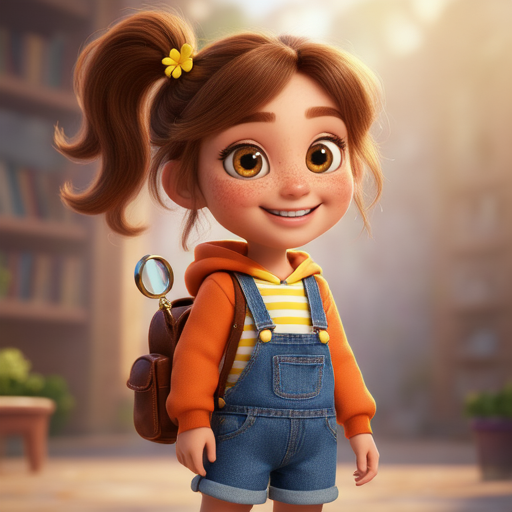

In [10]:
prompt = "A cheerful 7-year-old girl with large sparkling hazel eyes, soft freckles across her cheeks, and warm light skin. She has tousled chestnut-brown hair tied in a playful high ponytail with a small yellow flower clip. She wears an orange hoodie over a yellow-and-white striped shirt, denim overalls with rolled-up shorts, and carries a small brown leather backpack with a magnifying glass attached to the side. She has a bright, expressive smile and curious personality. Pixar-style 3D animated character, ultra-detailed skin texture, soft cinematic lighting, shallow depth of field, vibrant colors, child-friendly, high resolution, consistent character design."
avatar = pipe.text2image(prompt)[0]
display(avatar)

## Text to Image

In [15]:
# # generisi sve scene odjednom
# images = pipe.text2image(story.prompts)

# for scene, img in zip(story.scenes, images):
#     print(scene.title)
#     display(img)

## Image to Image

In [16]:
from PIL import Image, ImageDraw, ImageFont


def image_grid(
    images: list[Image.Image],
    cols: int = 3,
    cell_size: int = 512,
    titles: list[str] | None = None,
    font_size: int = 24,
) -> Image.Image:
    title_h = (font_size + 16) if titles else 0
    rows = (len(images) + cols - 1) // cols
    grid_w = cols * cell_size
    grid_h = rows * (cell_size + title_h)
    grid = Image.new("RGB", (grid_w, grid_h), (255, 255, 255))
    draw = ImageDraw.Draw(grid)
    try:
        font = ImageFont.truetype("/usr/share/fonts/TTF/DejaVuSans.ttf", font_size)
    except OSError:
        font = ImageFont.load_default(size=font_size)

    for i, img in enumerate(images):
        r, c = divmod(i, cols)
        x = c * cell_size
        y = r * (cell_size + title_h)
        if titles and i < len(titles):
            tw = draw.textlength(titles[i], font=font)
            draw.text(((x + (cell_size - tw) / 2), y + 4), titles[i], fill="black", font=font)
        grid.paste(img.resize((cell_size, cell_size)), (x, y + title_h))
    return grid

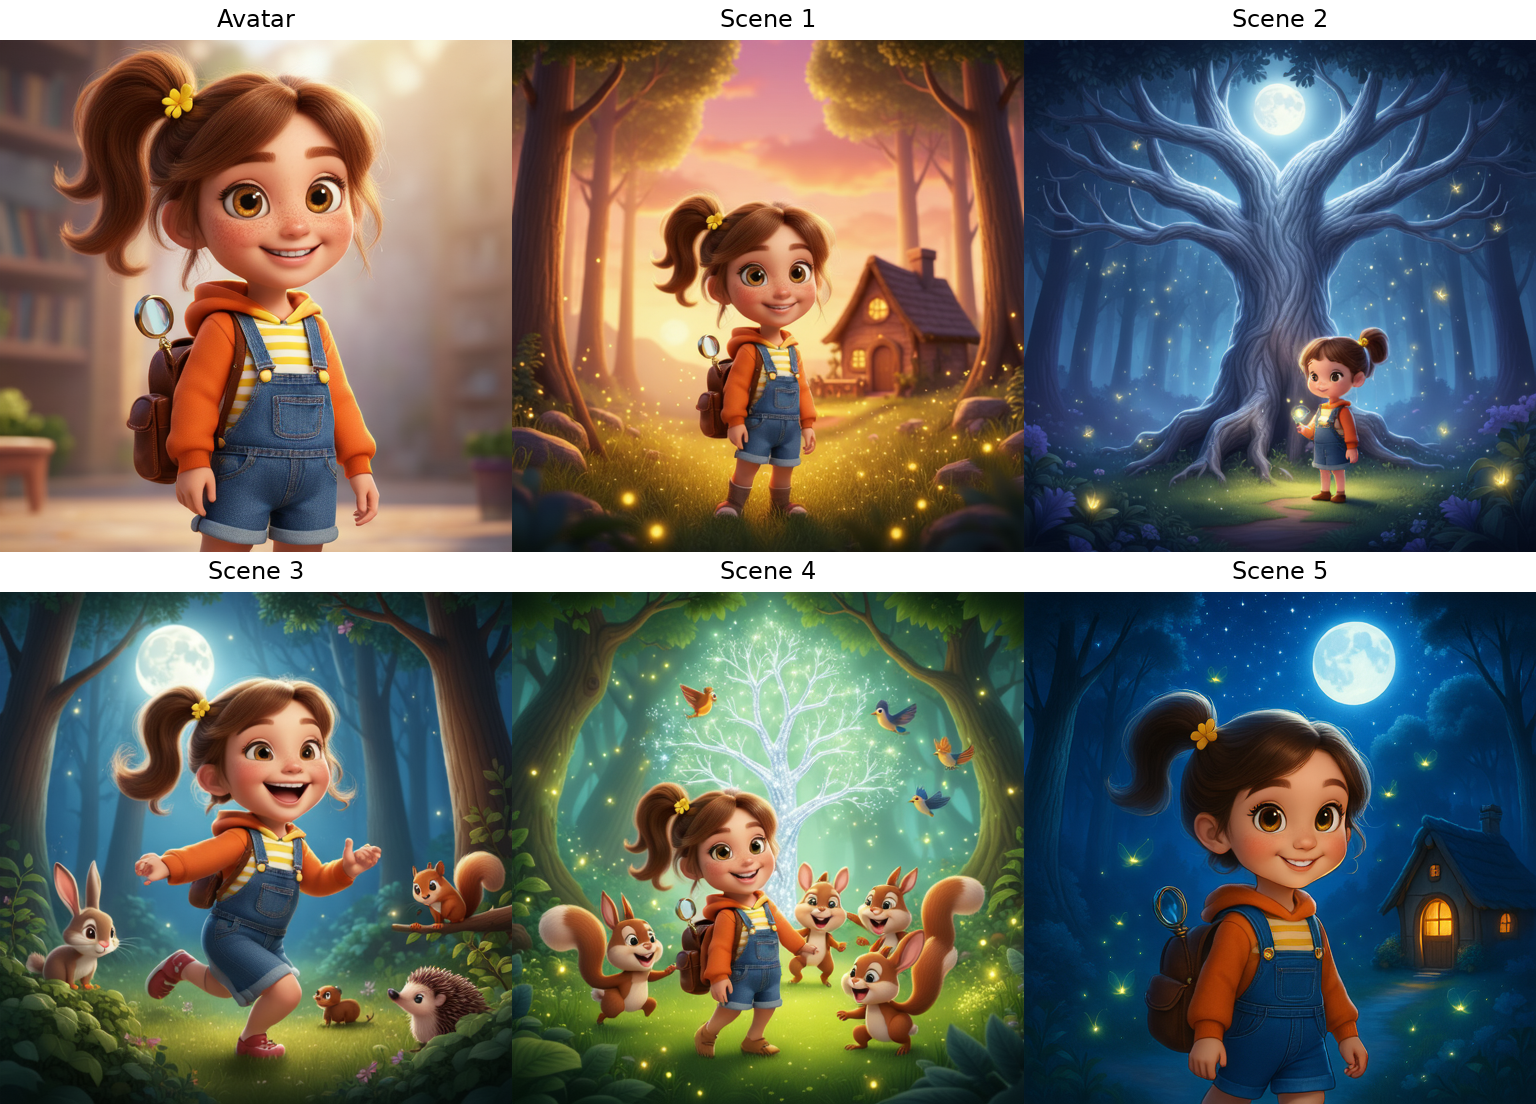

: 

In [ ]:
edited = pipe.image2image(
    story.prompts,
    image=avatar,
)

all_images = [avatar] + edited
titles = ["Avatar"] + [f"Scene {i}" for i in range(1, len(edited) + 1)]
image_grid(all_images, cols=3, titles=titles)